In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'MCD'
data = pd.DataFrame()


data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2009-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change()) #pct_change() = percent change #Obtains simple returns from a provided dataset

In [4]:
log_returns.tail()

,MCD
Date,
2019-11-11,-0.005023
2019-11-12,0.003317
2019-11-13,0.008860
2019-11-14,-0.005141
2019-11-15,-0.000155


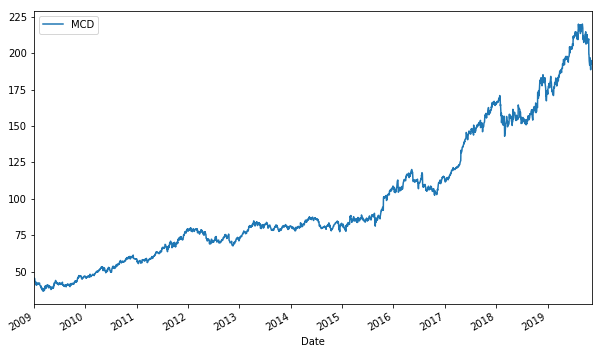

In [6]:
data.plot(figsize=(10,6)); #Plots price of MCD

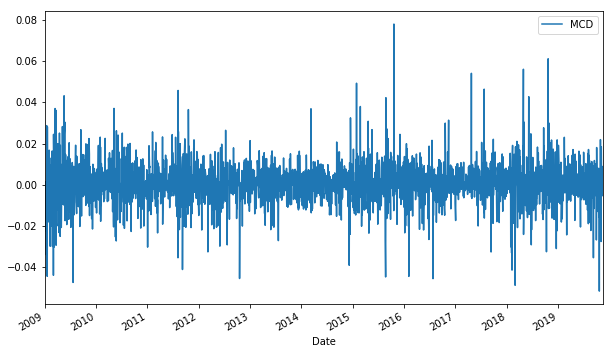

In [7]:
log_returns.plot(figsize = (10,6)) #Plots log returns

In [8]:
u = log_returns.mean()
u

MCD    0.000529
dtype: float64

In [9]:
var = log_returns.var()
var

MCD    0.000106
dtype: float64

                        Drift = u - 0.5(var)
                        
                        
We do not need to annualise because we are trying to predict MCD daily stock price

In [10]:
drift = u - (0.5 * var)
drift

MCD    0.000476
dtype: float64

In [11]:
stdev = log_returns.std()
stdev

MCD    0.010319
dtype: float64

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift) #can also use drift.values to turn the drift value into an array

array([0.00047577])

In [15]:
drift.values #Trandsfer object to a numpy array

array([0.00047577])

In [16]:
stdev.values

array([0.01031932])

#### Z corresponds to the distance between the mean and the events, expressed as the number of standard deviations

In [48]:
norm.ppf(0.95) 

1.6448536269514722

In [49]:
x = np.random.rand(10,2) #Obtain a 10 by 2 matrix
x

array([[0.27070563, 0.13674531],
       [0.85399077, 0.99106518],
       [0.76947026, 0.97427402],
       [0.64293063, 0.97814666],
       [0.65645459, 0.91039213],
       [0.72638972, 0.74533318],
       [0.31189013, 0.96528645],
       [0.34437572, 0.1068094 ],
       [0.01813223, 0.31995373],
       [0.79414809, 0.37382706]])

In [50]:
norm.ppf(x) #Obtain distance from the mean corresponding to each of the aboves random probabilities

array([[-0.61068029, -1.09505938],
       [ 1.05370401,  2.36830847],
       [ 0.73710337,  1.94769094],
       [ 0.36630335,  2.01689294],
       [ 0.40280617,  1.34317369],
       [ 0.60193025,  0.65987564],
       [-0.49049982,  1.81563031],
       [-0.40055002, -1.24367607],
       [-2.09394969, -0.46782818],
       [ 0.82089897, -0.32173414]])

In [51]:
#Combining the previous 2 lines together to get Z
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 8.52941327e-01,  1.33544042e+00],
       [-1.28759059e+00, -1.11392478e+00],
       [ 2.75912708e-01, -1.89452113e-01],
       [ 1.39753422e+00,  1.25031618e+00],
       [-4.42405285e-01, -2.37443377e-01],
       [-9.03336349e-01, -4.77771160e-01],
       [-8.13824350e-01, -7.22446251e-01],
       [-1.00601532e+00,  1.80677812e-03],
       [ 2.15973761e+00,  6.66899972e-01],
       [ 5.43995717e-01, -3.27904064e-01]])

In [60]:
t_intervals = 1000 #Forecasting of 1000 days
iterations = 50 #50 series of future stock price predictions

                                daily_returns = e^r
                                r = drift + stdev.z

In [61]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns #Obtain 50 sets of 1000 random future stock prices

array([[1.0032682 , 1.00679801, 1.01283057, ..., 1.00274213, 0.99199188,
        1.00117263],
       [0.98757881, 0.99913713, 0.98981336, ..., 1.01579143, 0.98164906,
        1.0067742 ],
       [0.99454838, 0.99297821, 1.01556486, ..., 1.00881547, 0.99694898,
        0.99176952],
       ...,
       [1.00067119, 0.98791442, 0.99738952, ..., 0.9919542 , 1.00221789,
        0.96476056],
       [1.01095829, 0.99616635, 1.01112522, ..., 1.0109464 , 1.02025367,
        1.00515355],
       [0.99113756, 0.98977021, 1.0027712 , ..., 1.01203142, 1.01759707,
        1.0070453 ]])

                        St = S0 . daily_returnt #Predict companies stock price 1000 days from now
                        
                        St+1 = St . daily_returnt+1
                        
                        
                       ........................
                       
                       
                       St+999 = St+998 . daily_returnt+999 

In [62]:
S0 = data.iloc[-1] #Use -1 to find the S0
S0 #Stock price today at starting point

MCD    193.970001
Name: 2019-11-15 00:00:00, dtype: float64

In [63]:
#Price list as big as the daily_returns list
price_list = np.zeros_like(daily_returns) #Zeros_like()= create an array with the same dimensions as an array that exists
price_list #We create an array of zeros so we can replace it with stock prices using a loop

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
price_list[0] = S0 #Set every 1st row of our price list to S0
price_list

array([[193.97000122, 193.97000122, 193.97000122, ..., 193.97000122,
        193.97000122, 193.97000122],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [65]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t] #Formula listed above heading

In [66]:
price_list

array([[193.97000122, 193.97000122, 193.97000122, ..., 193.97000122,
        193.97000122, 193.97000122],
       [191.56066369, 193.8026311 , 191.99409831, ..., 197.03306586,
        190.41046911, 195.28399214],
       [190.51634762, 192.4417894 , 194.98246022, ..., 198.77000519,
        189.82952311, 193.67671188],
       ...,
       [153.21278038, 296.91485293, 333.16362263, ..., 258.51424652,
        436.54185191, 397.62527669],
       [154.89173027, 295.77658555, 336.87014077, ..., 261.3440466 ,
        445.38342783, 399.67445754],
       [153.51901084, 292.75085323, 337.8036747 , ..., 264.48838705,
        453.22086978, 402.49028465]])

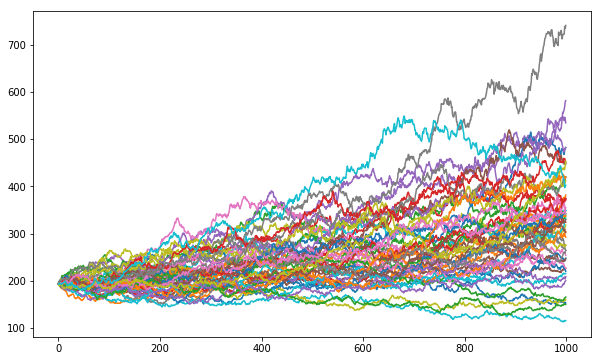

In [67]:
plt.figure(figsize=(10,6)) #matplotlib plots graphs
plt.plot(price_list);